<h1 align="center">COURSE "Python Programming for DS"</h1>

_<h1 align="center">Final Project</h1>_
_<h1 align="center">PHYSICAL ACTIVITY CLASSIFIER</h1>_

### Completed by:
*   Denys Botuk

Objective of this project is given accelerometer data (coordinates $xyz$ of the movement) to prepare and organize this data to build a classifier of activities type. I'm going to try and compare few types of model to choose those, which provides the highest accuracy.

Now let import main libraries, which will be useful for each phase of the project.

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats as st
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

All the provided data are in the folder 'data', which contains $4$ subfolders with names, which correspond to the activity classes, which we need to classify. Let's extract the list of activity classes, we will classify.

In [2]:
data_folder = Path('data')
activities = [f.name for f in data_folder.iterdir()]
activities

['running', 'idle', 'walking', 'stairs']

Inside each folder we have samples with data for different users.
Now, look at one example per each class to identify the structure of data files.

In [3]:
examples = {}
for activity in activities:
    activity_data_folder = data_folder / activity
    file = os.listdir(activity_data_folder)[0]
    df = pd.read_csv(activity_data_folder / file)
    examples[activity] = df

In [4]:
examples['running']

accelerometer_X  accelerometer_Y  accelerometer_Z
0          1.757344        -5.875371        -3.878607
1          2.461239        12.986150         1.762132
2         22.682667        22.922087        -1.738190
3         11.875240         4.611233        -8.389283
4         -5.295974         4.783615        -1.273715
5          1.221043        -7.733271        -7.101202
6         11.415554        28.538885         9.227253
7         15.102624        23.156720        12.014104
8          2.394202        -5.276820         1.115698
9          0.871489        27.854143        -4.496310
10         1.192313        14.073117        -9.667787
11        10.529699        -8.437167        -0.215478
12         5.688624        13.096283         5.185841
13        27.087997        29.836542         7.393295
14         0.871489        -4.707000        -6.493075
15        -2.700659         5.803545         3.375825
16         6.655881         0.440533        -2.030283
17        23.491907        22.443247         7.752425
18        -3.256114        11.195287        -2.212242
19        24.832660        21.820757        -0.881066
20        13.833697         3.979163        -4.237737
21        -1.426944         6.493075        -3.122039
22        11.458650        -9.452309         0.804452
23         4.927267        23.295582         9.011775
24         1.259350        20.853497         1.316811
25         3.552995        -3.026271        -2.595315
26         0.493206        11.597513        -1.163582
27        16.122555        18.923770        -3.438074
28         7.163452         4.156334        -5.554548
29         6.019023        10.955867         1.819593

In [5]:
examples['idle']

accelerometer_X  accelerometer_Y  accelerometer_Z
0          0.009577         5.937620         7.570466
1          0.086191         6.555324         7.785944
2          0.004788         6.440403         7.139510
3          0.277727         6.430826         7.690176
4         -0.047884         6.239290         7.340623
5         -0.119710         6.545748         6.042965
6         -0.023942         6.224925         7.287950
7          0.244209         6.200983         7.603985
8          0.545878         6.306328         7.048530
9         -0.071826         6.047754         8.216900
10         0.263362         5.947197         7.417237
11         0.143652         5.995081         7.436391
12         0.119710         6.335058         7.627927
13         0.220267         6.555324         7.010223
14        -0.464475         6.402096         7.359776
15        -0.143652         5.473145         8.183381
16        -0.038307         6.148310         7.661446
17        -0.062249         6.531382         7.110780
18        -0.248997         6.268020         7.058107
19        -0.205901         6.215348         7.627927
20        -0.330400         6.090849         7.230490
21        -0.531513         6.885724         7.096414
22        -0.885855         6.823475         6.560113
23        -0.392649         6.636728         6.497864
24        -0.263362         6.445191         7.469909
25        -0.531513         6.301539         7.345411
26        -0.234632         6.287174         7.594408
27        -0.014365         7.134722         6.651093
28         0.043096         6.732496         7.455544
29         0.828394         6.655881         7.034165

In [6]:
examples['walking']

accelerometer_X  accelerometer_Y  accelerometer_Z
0          0.914585       -10.975020        -0.167594
1         -6.497863       -18.291700        -3.773262
2        -10.103531       -11.851298         3.414132
3        -13.690045       -25.866955        -3.150769
4        -12.703634       -12.234370        -1.331176
5         -4.362235         7.584831         7.876924
6         -0.383072       -14.188039        -3.974375
7         -5.549759        -9.572019        -7.685387
8         -0.435745       -10.477027        -3.217807
9         -1.120486         0.708684         3.806781
10        -1.379060        -6.153098        -1.225831
11         0.967258        -7.149086         1.632846
12         0.062249       -13.350069        -3.438074
13       -13.120225       -19.948488        -4.194641
14        -4.031835        -6.545747        -2.102109
15        -2.978387        -9.385271        -0.301669
16        -4.505887       -23.238123         0.181959
17        -6.406883       -12.411542         3.361459
18        -9.054871       -23.616405       -17.022774
19        -2.264915       -12.114660        -0.967257
20       -18.598158       -16.438590       -20.738573
21        -3.078943        -9.528923        -2.523488
22        -1.393425         0.258574         4.108450
23        -0.766144        -7.757213         0.268151
24         2.250550        -6.952761         1.628057
25        -0.919373        -6.617573         0.775721
26       -12.976573       -14.283808         6.306328
27        -2.777274        -7.029376         0.612916
28       -11.300632       -12.646173        -2.164358
29         1.594538        -9.289502        19.685127

In [7]:
examples['stairs']

accelerometer_X  accelerometer_Y  accelerometer_Z
0          3.907337        -4.984728        -3.821146
1          0.354342        -9.567230        -5.770026
2          0.991200       -10.290278        -5.099649
3         -2.389413       -12.220005        -6.330269
4         -1.786074       -18.737022         6.244078
5          4.644751       -11.018116        -1.048660
6         -2.269703        -2.782062         2.398990
7          1.479617        -9.251195        -0.857124
8          5.152323       -11.702858        -2.279280
9          1.637634       -22.720974       -10.491392
10        -2.346318        -3.270479         1.063026
11        -1.685518        -7.580042        -1.623269
12        -1.800440        -7.465121        -3.069367
13        -0.124498       -12.559982         6.751649
14         1.752556       -17.501614        -3.801992
15         2.331953        -9.744401        -7.407660
16         3.222596        -8.920795        -3.088520
17        -3.457227        -2.715025         0.148441
18         2.264915        -9.931149        -4.659116
19         0.991200       -10.903194        -8.183381
20         2.226608        -8.044517        -2.341529
21        -1.647211       -11.851298         6.775591
22         8.398860       -13.771448        -2.566584
23         2.494758       -10.328587        -8.690952
24         0.823605        -7.383718        -3.596091
25        -6.224924       -12.234370       -26.230873
26         1.273715        -6.502651        -3.572149
27         0.723049        -6.871359        -4.079719
28         2.226608        -7.575254       -12.555194
29         3.284845       -11.966220        -3.892972

So, we have the samples of the same structure. It contains $30$ entries with $3$ features 'accelerometer_X', 'accelerometer_Y' , 'accelerometer_Z'.

Let analyze class labels distribution:

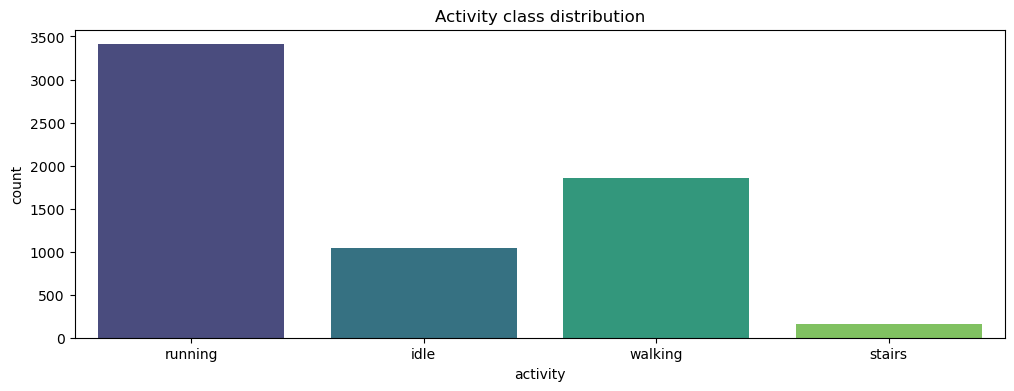

In [8]:
series = []
for activity in activities:
    activity_data_folder = data_folder / activity
    count = len(os.listdir(activity_data_folder))
    series.append(pd.Series({'activity': activity, 'count': count}))
    
df = pd.DataFrame(series)
plt.figure(figsize=(12, 4))
sns.barplot(df, x='activity', y='count', palette='viridis')
plt.title('Activity class distribution')
plt.show()

As we can see there is a significant class imbalance here with majority of the samples having activity class 'running'. 'stair' activities have least representation in the dataset.

Now take a look how the signal values in each of the $x$, $y$ and $z$ dimension varies with time. For this purporse we take example samples above.

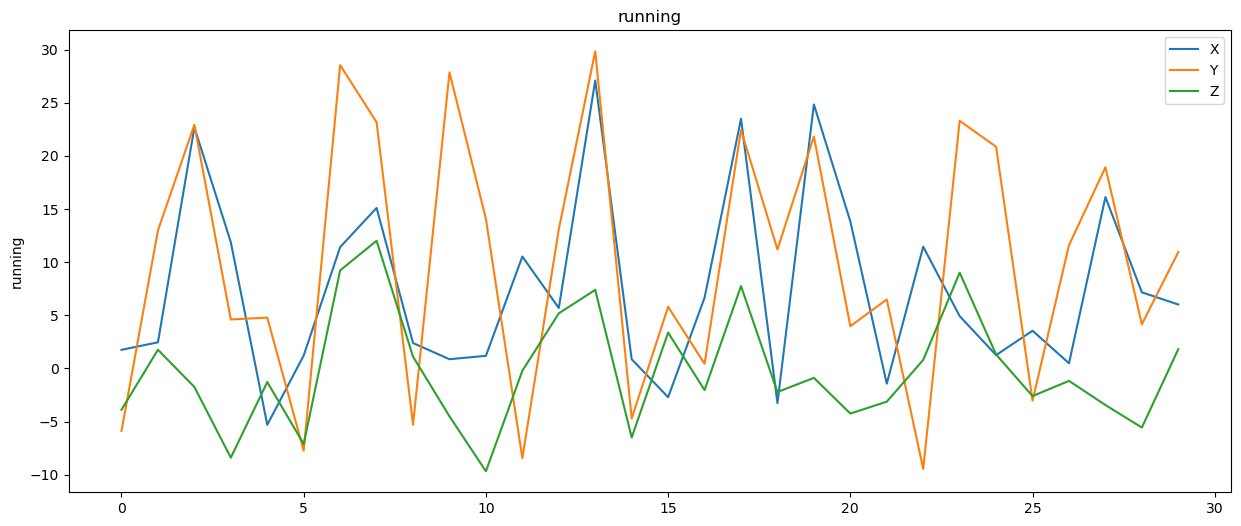

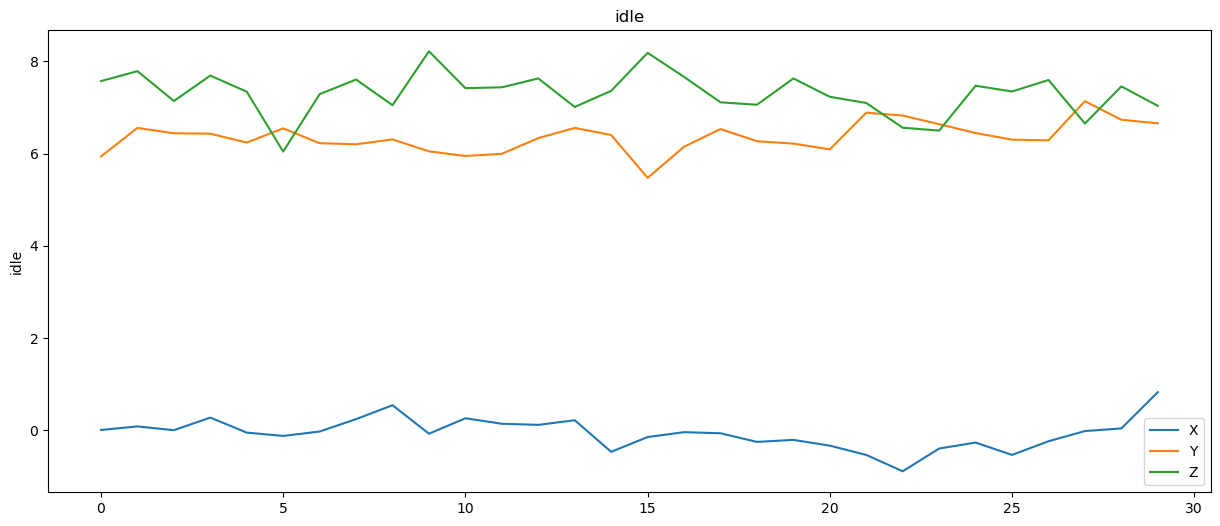

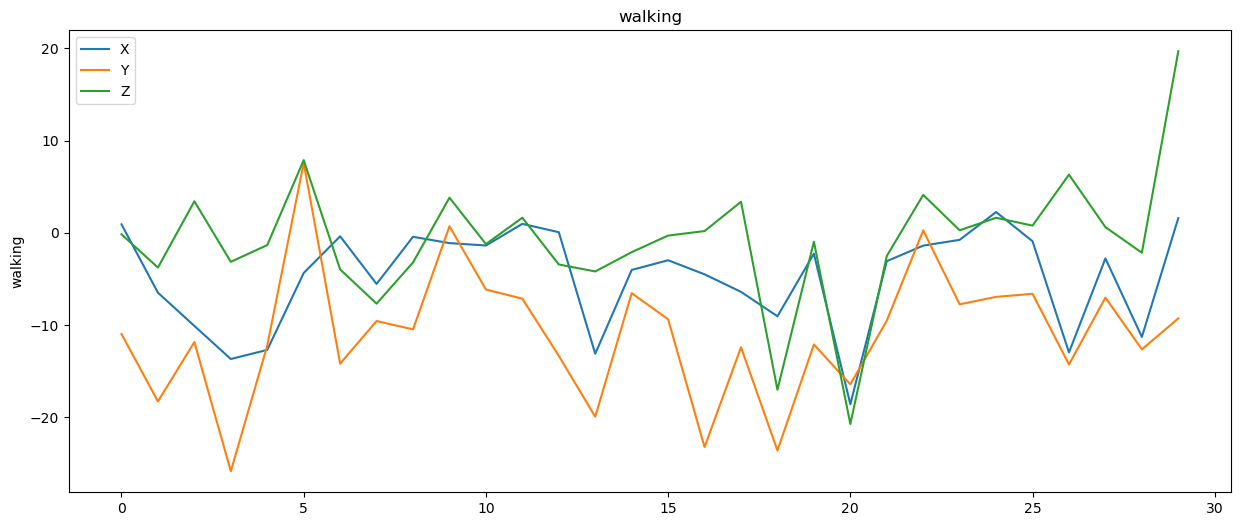

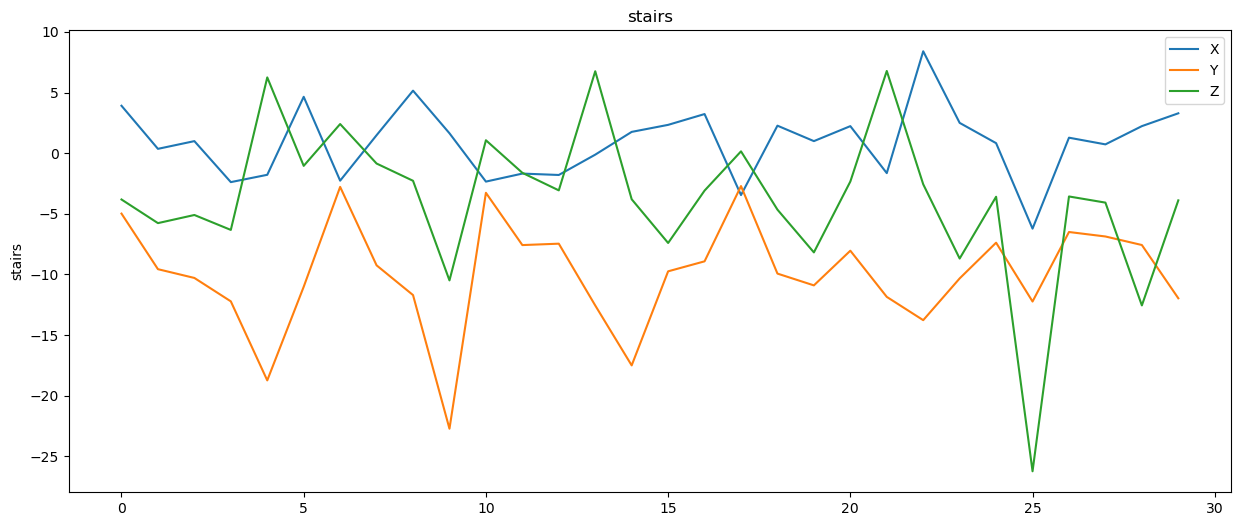

In [9]:
for key in examples.keys():
    plt.figure(figsize = (15, 6))
    sns.lineplot(x=range(30), y='accelerometer_X', label='X', data=examples[key])
    sns.lineplot(x=range(30), y='accelerometer_Y', label='Y', data=examples[key])
    sns.lineplot(x=range(30), y='accelerometer_Z', label='Z', data=examples[key])
    plt.ylabel(key)
    plt.title(key)
    plt.show()

Here we can see that 'idle' acitivity as expected has very less movement than others. There is some periodic behavior for 'running', 'walking', 'stairs'. 'walking' and 'stairs' behavior has some similiraty, therefore I assume we will have some issues to classify it.

As standard classification algorithms cannot work directly with groups of time-series data. Instead, first we must transform it, aggregating all the samples into the one. For this purporse, we need to generate some general features, which will generalize each of sample.

The main goal of the feature engineering stage in any ML problem is to provide as much possible information to the model. The more information we provide, better it learns. 

So, let start generating features per each sample into general one. We will build simple statistical features.

In [10]:
rows = []
for activity in activities:
    activity_data_folder = data_folder / activity
    for file in activity_data_folder.iterdir():
        df = pd.read_csv(file)
        
        ser = pd.Series()
        
        x = np.array(df['accelerometer_X'])
        y = np.array(df['accelerometer_Y'])
        z = np.array(df['accelerometer_Z'])
        
        # mean value
        ser['x_mean'] = np.mean(df['accelerometer_X'])
        ser['y_mean'] = np.mean(df['accelerometer_Y'])
        ser['z_mean'] = np.mean(df['accelerometer_Z'])
        
        # standard deviation value
        ser['x_std'] = np.std(df['accelerometer_X'])
        ser['y_std'] = np.std(df['accelerometer_Y'])
        ser['z_std'] = np.std(df['accelerometer_Z'])
        
        # average absolute deviation value
        ser['x_aad'] = np.mean(np.absolute(x - np.mean(x)))
        ser['y_aad'] = np.mean(np.absolute(y - np.mean(y)))
        ser['z_aad'] = np.mean(np.absolute(z - np.mean(z)))
        
        # max value
        ser['x_max'] = x.max()
        ser['y_max'] = y.max()
        ser['z_max'] = z.max()
        
        # min value
        ser['x_min'] = x.min()
        ser['y_min'] = y.min()
        ser['z_min'] = z.min()
        
        # max-min diff value
        ser['x_maxmin_diff'] = x.max() - x.min()
        ser['y_maxmin_diff'] = y.max() - y.min()
        ser['z_maxmin_diff'] = z.max() - z.min()
        
        # median value
        ser['x_median'] = np.median(x)
        ser['y_median'] = np.median(y)
        ser['z_median'] = np.median(z)
        
        # median absolute deviation value
        ser['x_aad'] = np.mean(np.absolute(x - np.median(x)))
        ser['y_aad'] = np.mean(np.absolute(y - np.median(y)))
        ser['z_aad'] = np.mean(np.absolute(z - np.median(z)))
        
        # interquartile range value
        ser['x_iqr'] = np.percentile(x, 75) - np.percentile(x, 25)
        ser['y_iqr'] = np.percentile(y, 75) - np.percentile(y, 25)
        ser['z_iqr'] = np.percentile(z, 75) - np.percentile(z, 25)
        
        # negative count
        ser['x_neg_count'] = np.sum(x < 0)
        ser['y_neg_count'] = np.sum(y < 0)
        ser['z_neg_count'] = np.sum(z < 0)
        
        # positive count
        ser['x_pos_count'] = np.sum(x > 0)
        ser['y_pos_count'] = np.sum(y > 0)
        ser['z_pos_count'] = np.sum(z > 0)
        
        # values above mean
        ser['x_am_count'] = np.sum(x > x.mean())
        ser['y_am_count'] = np.sum(y > y.mean())
        ser['z_am_count'] = np.sum(z > z.mean())
        
        # skewness value
        ser['x_skewness'] = st.skew(x)
        ser['y_skewness'] = st.skew(y)
        ser['z_skewness'] = st.skew(z)
        
        # energy value
        ser['x_energy'] = np.sum(x**2) / len(x)
        ser['y_energy'] = np.sum(y**2) / len(y)
        ser['z_energy'] = np.sum(z**2) / len(z)
        
        x_sum = np.sum(x)
        y_sum = np.sum(y)
        z_sum = np.sum(z)
        
        ser['x_path_length'] = np.sum(np.abs(x))
        ser['y_path_length'] = np.sum(np.abs(y))
        ser['z_path_length'] = np.sum(np.abs(z))
        
        ser['xy_corr'] = np.corrcoef(x, y)[0][1]
        ser['xz_corr'] = np.corrcoef(x, z)[0][1]
        ser['yz_corr'] = np.corrcoef(y, z)[0][1]
        
        ser['shift'] = math.sqrt((x_sum - x[0])**2 + (y_sum - y[0])**2 + (z_sum - z[0])**2)
        
        ser['path_length'] = np.sqrt(np.sum(x**2 + y**2 + z**2))
        ser['activity'] = activity
        
        rows.append(ser)
data = pd.DataFrame.from_records(rows)
data = data.sample(frac = 1)
data

x_mean     y_mean    z_mean     x_std      y_std     z_std     x_aad  \
2569  5.200206   6.920520  2.121422  8.768647  11.175576  7.349097  6.645346   
3337  9.231882   9.368352  3.064898  9.437787  11.690644  9.305151  7.746839   
5196 -3.917073  -9.049763 -2.207773  3.193443   5.722223  6.854893  2.367865   
1108  7.669426   6.765056  2.114080  8.098968  12.932861  5.635450  6.225563   
674   6.873753   8.670203 -0.115720  9.160460  10.457396  4.455693  7.024747   
...        ...        ...       ...       ...        ...       ...       ...   
2081  7.658413   8.584650  1.340274  9.509103  14.508141  8.280744  6.887480   
6138 -4.587450 -10.006007 -0.479958  4.167023   6.097598  8.319059  3.171040   
3960  0.030167   1.913287  8.893502  0.691576   2.639566  1.519269  0.389297   
3154  6.660829   6.628747  3.265532  9.260797   8.292063  7.230209  6.212315   
4126  0.266554  -0.026336  9.773610  0.040392   0.031829  0.023009  0.030646   

          y_aad     z_aad      x_max  ...   z_energy  x_path_length  \
2569   8.968360  6.125804  30.248344  ...  58.509659     222.047842   
3337   9.388782  7.100883  29.965828  ...  95.979428     286.734387   
5196   4.321375  4.254975   4.716578  ...  51.863823     126.945358   
1108  10.675267  4.403256  28.936321  ...  36.227634     265.947927   
674    9.035079  3.498886  26.551697  ...  19.866594     251.654541   
...         ...       ...        ...  ...        ...            ...   
2081  12.235328  6.065470  38.331170  ...  70.367063     287.711218   
6138   4.695987  5.108109   1.010353  ...  69.437102     142.296981   
3960   1.881364  0.903891   1.077391  ...  81.402551      12.004527   
3154   6.521486  5.593973  32.953793  ...  62.939624     221.286488   
4126   0.023144  0.017079   0.368707  ...  95.523988       7.996634   

      y_path_length  z_path_length   xy_corr   xz_corr   yz_corr       shift  \
2569     344.429859     189.596831  0.361212  0.195611  0.582895  254.049741   
3337     391.557323     220.458090  0.532171  0.262247  0.684808  391.088237   
5196     298.863409     147.530708  0.241791  0.478480  0.467954  290.166992   
1108     389.680273     133.907700  0.455130  0.515323  0.702619  295.789715   
674      345.885535     104.985745  0.537072  0.290210  0.352077  324.999238   
...             ...            ...       ...       ...       ...         ...   
2081     424.137620     182.232265  0.461053  0.397864  0.633051  326.457487   
6138     310.006021     156.125891  0.242758  0.320328  0.330578  319.138069   
3960      61.746467     266.805053  0.714301  0.280559 -0.400119  263.329885   
3154     270.037226     167.819176  0.463716  0.296969  0.549502  267.938771   
4126       0.924160     293.208309 -0.488077 -0.099505  0.064183  283.531297   

      path_length  activity  
2569   100.283810   running  
3337   121.825622   running  
5196    75.904035   walking  
1108   105.877180   running  
674    100.333243   running  
...           ...       ...  
2081   122.917503   running  
6138    85.757815   walking  
3960    52.681035      idle  
3154    95.775865   running  
4126    53.553257      idle  

[6462 rows x 48 columns]

Now let visualize each feature by scatter plots to see if we can separate each class using these features.

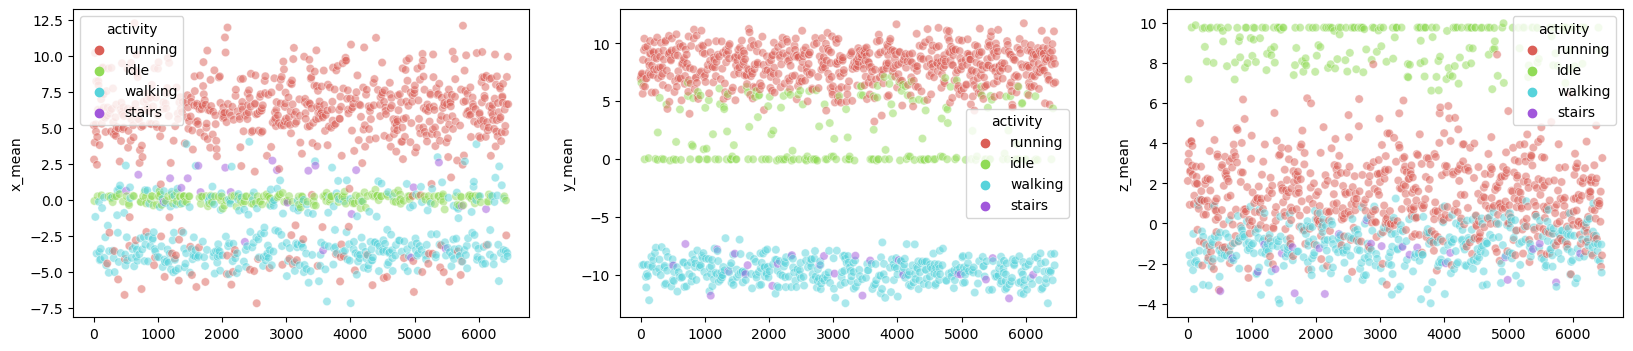

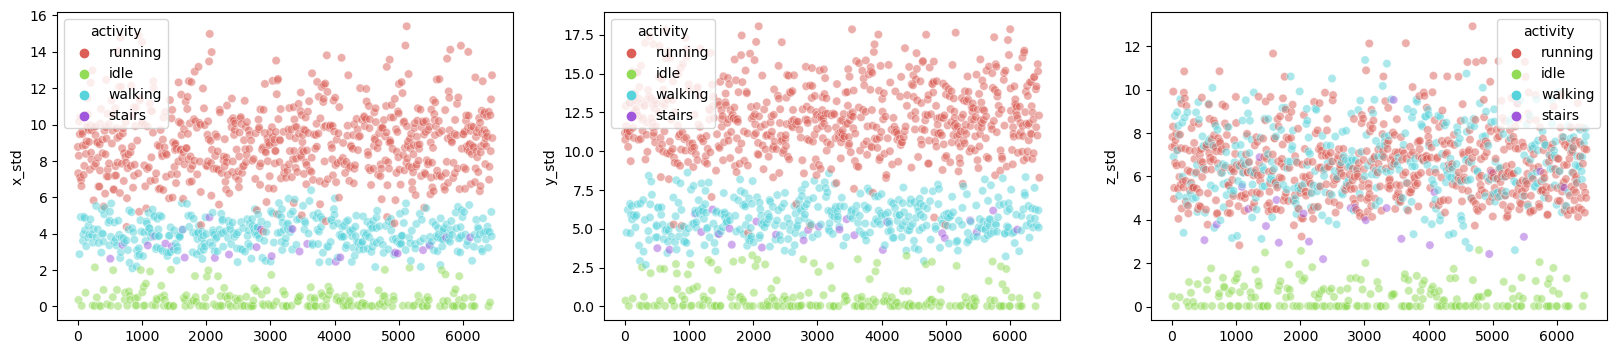

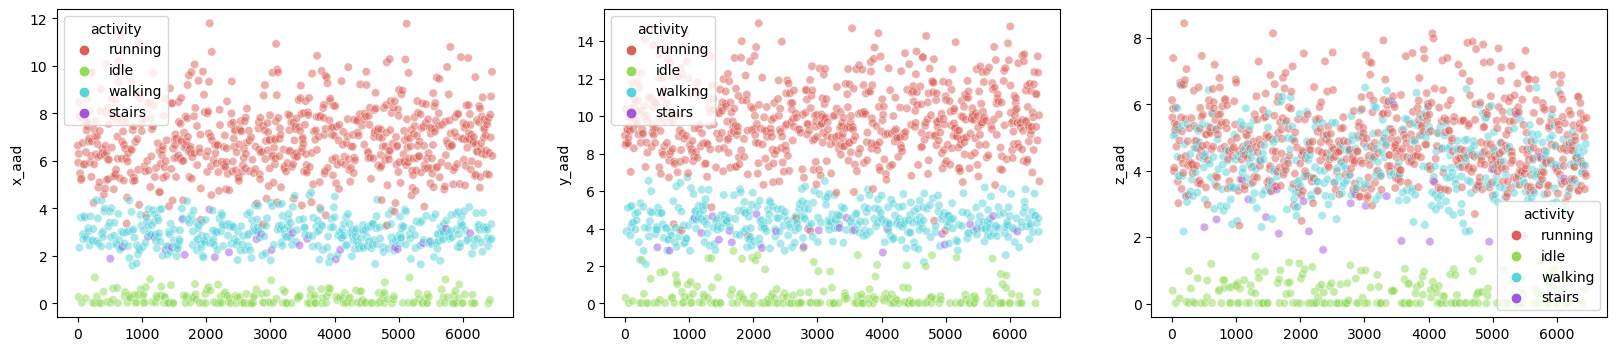

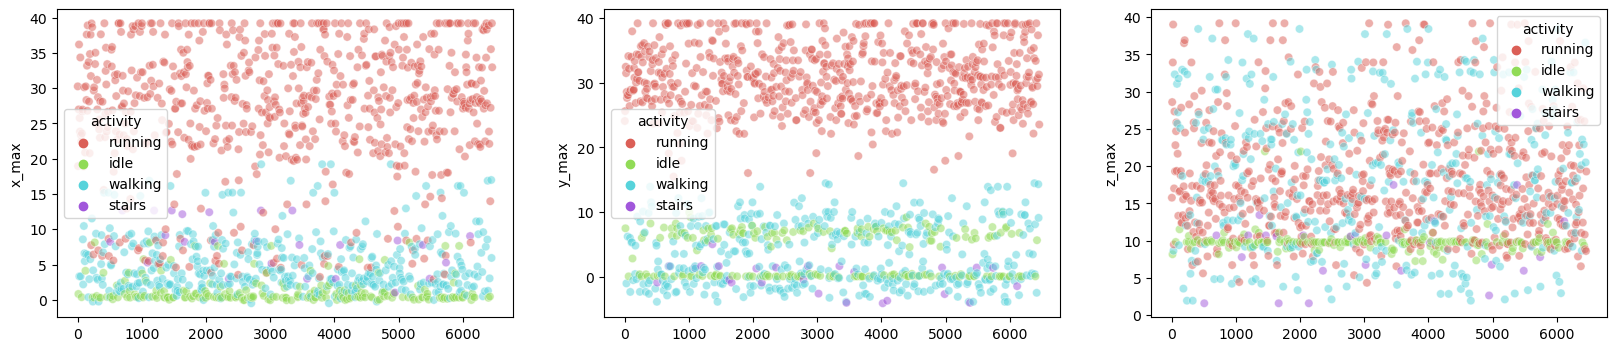

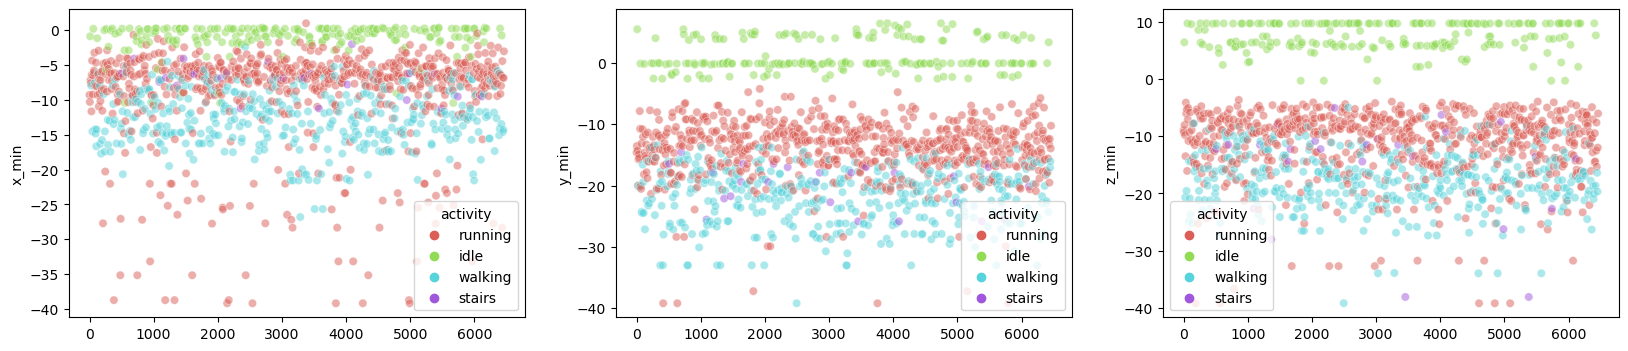

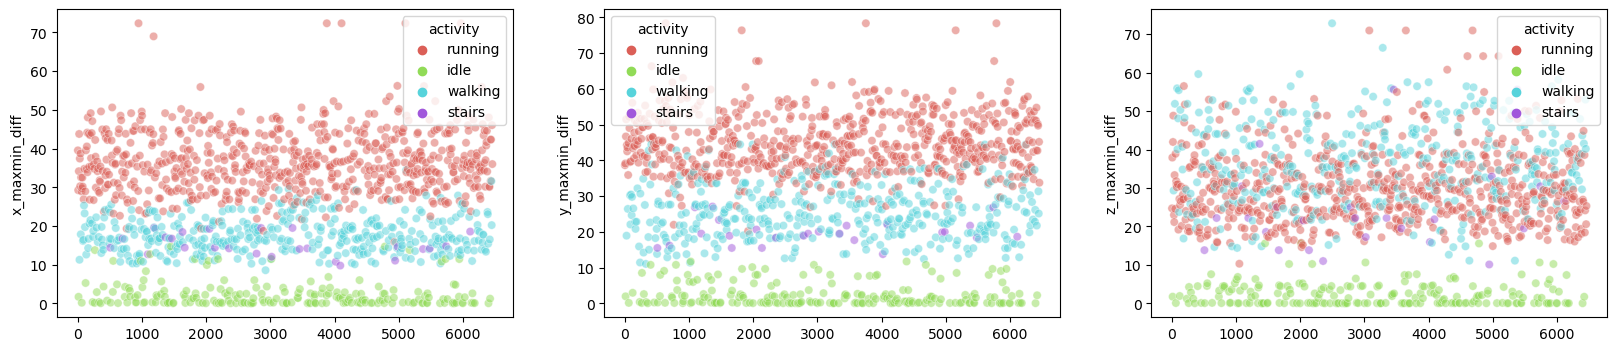

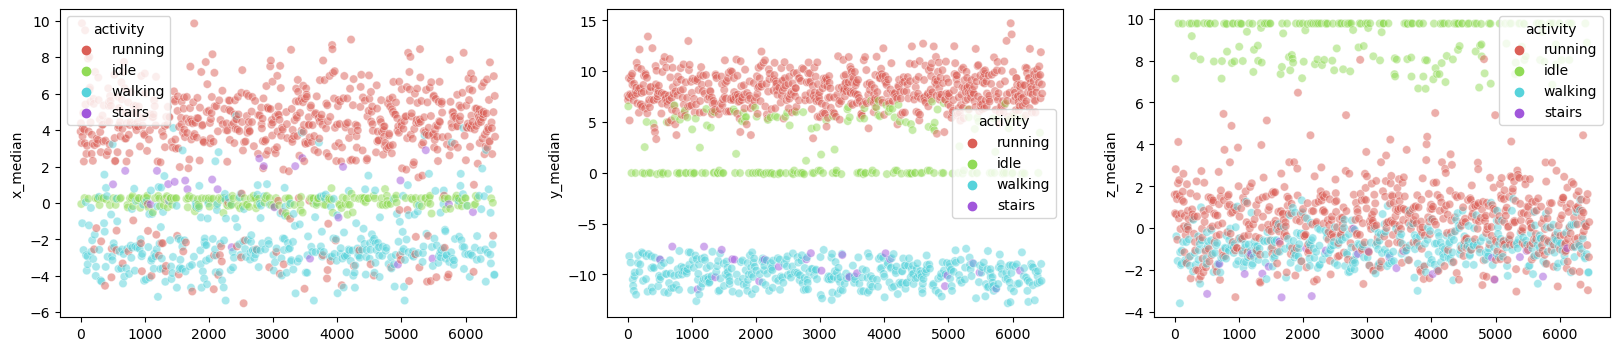

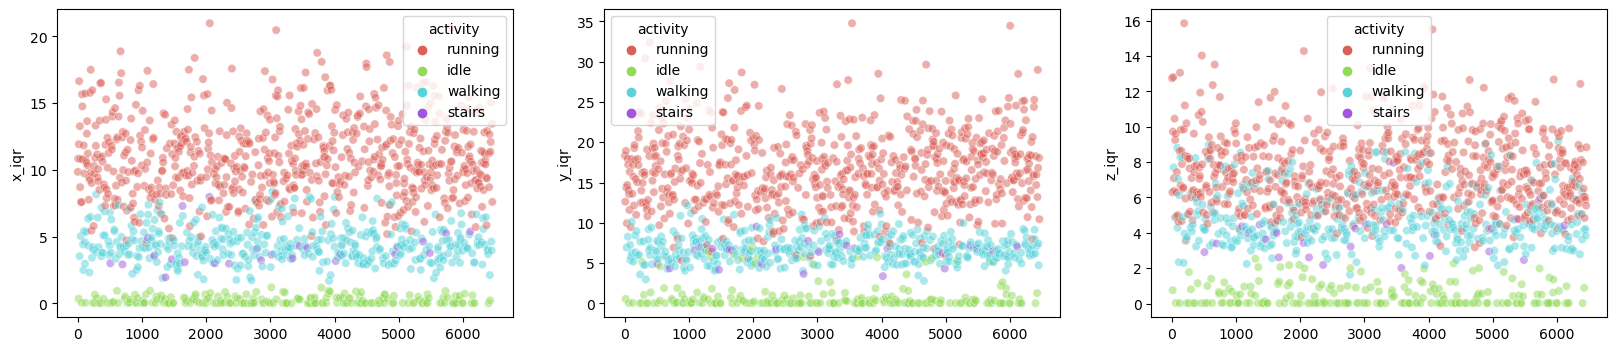

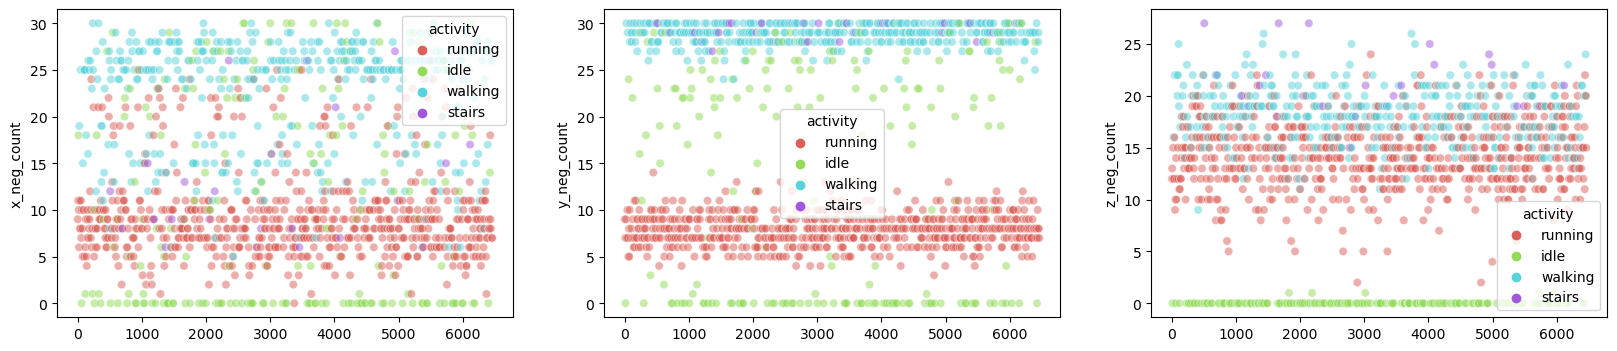

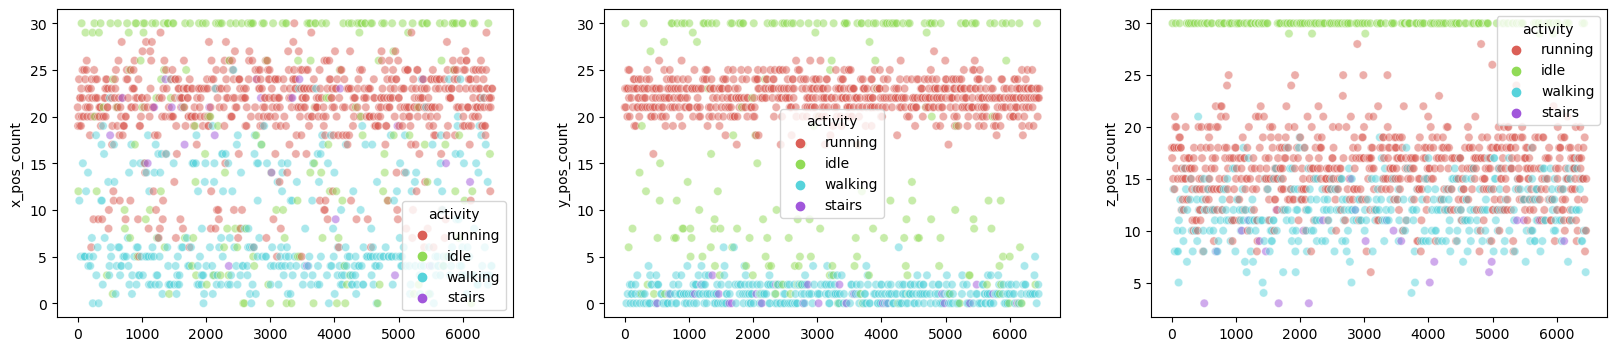

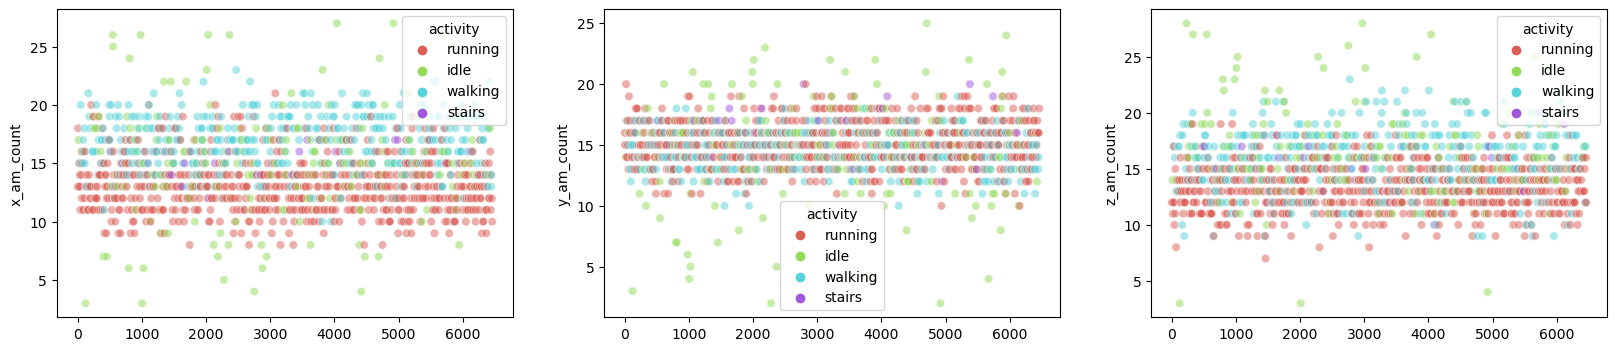

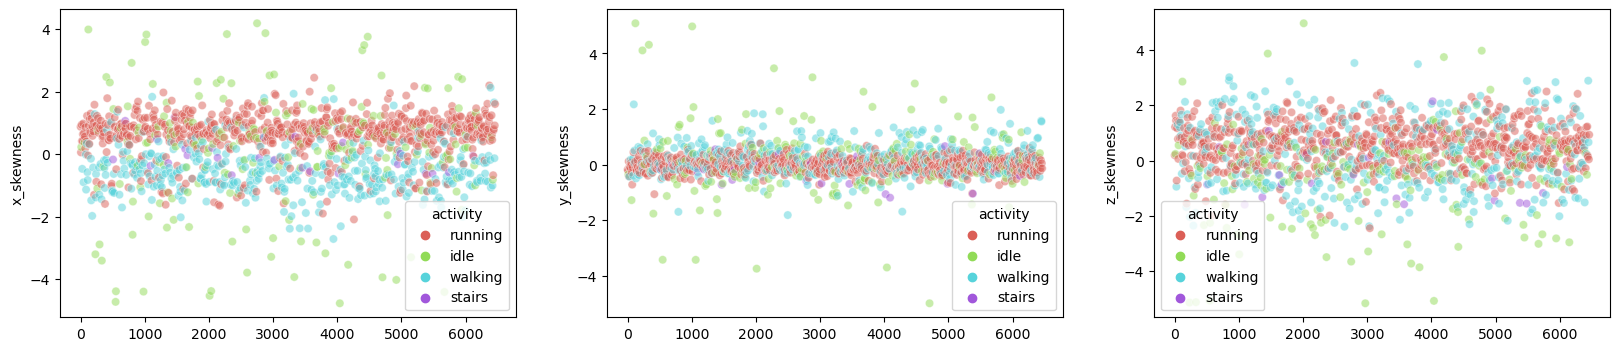

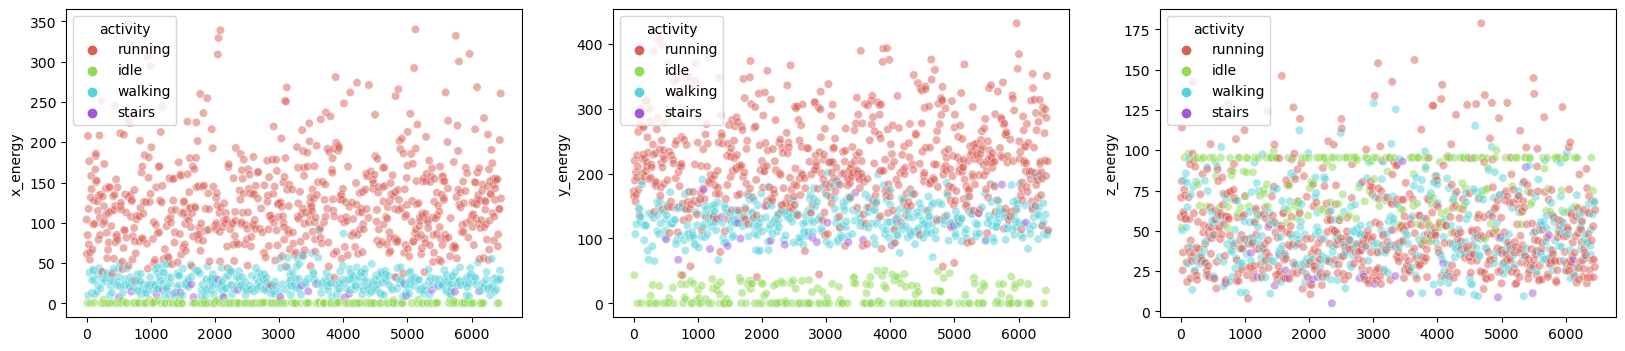

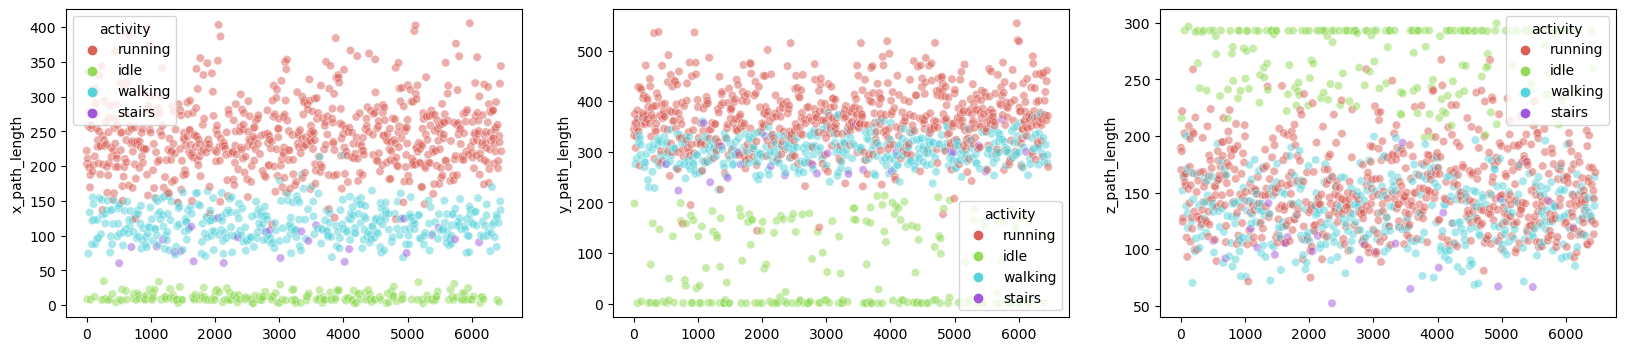

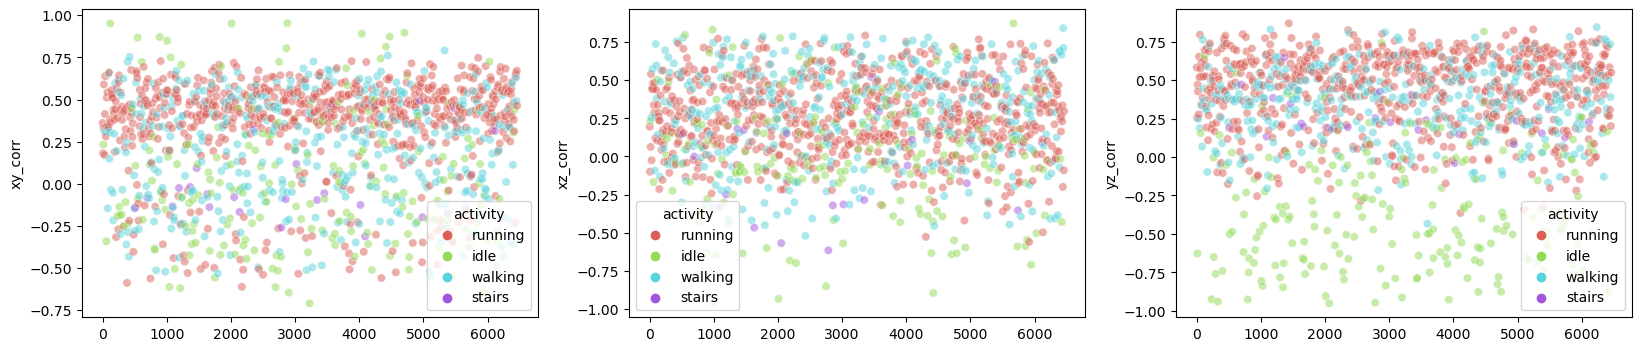

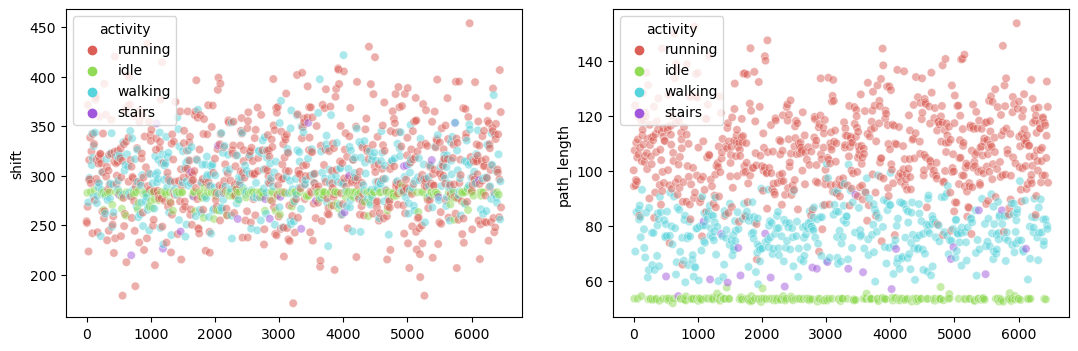

In [11]:
pos = 1
for col in data.columns[data.columns != 'activity']:
    if pos == 4:
        pos = 1
        
    if pos == 1:
        plt.figure(figsize=(20, 4));
    
    plt.subplot(1, 3, pos);
    sns.scatterplot(x=range(len(data))[::5], y=col, data=data[::5], hue='activity', palette='hls', alpha=0.5)
    pos += 1

So, we can see that some of the features are really good to separate some classes. So, we can easily classify them. As we supposed before, there could some problems with distinguishing walking and stairs, because in most cases, they are not separable visually.

Let's try to build and train some types of classification models. First of all, separate our sample to features and target value (activity class).

In [12]:
X = data[data.columns.difference(["activity"])]
y = data["activity"]

We'd like to try $4$ types of models, which could classify our data: Support Vector Machine, Decision Tree Classifier, Nearest Centroid Classifier, Random Forest Classifier.

In [13]:
from sklearn import svm
svm_model = svm.SVC()

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

from sklearn.neighbors import NearestCentroid
nc_model = NearestCentroid()

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

Let train and test it using cross validation and calculate the mean accuracy score:

In [14]:
from sklearn.model_selection import cross_val_score
svm_cv_score = cross_val_score(svm_model, X, y, cv=10).mean()
dt_cv_score = cross_val_score(dt_model, X, y, cv=10).mean()
nc_cv_score = cross_val_score(nc_model, X, y, cv=10).mean()
rf_cv_score = cross_val_score(rf_model, X, y, cv=10).mean()

svm_cv_score, dt_cv_score, nc_cv_score, rf_cv_score

(0.9744663390451762,
 0.9967504222871935,
 0.8472660193988928,
 0.9984522516401013)

So, we can see that most of models are good classifiers with accuracy $> 97\%$. The best one is Random Forest Classifier. Only one - Nearest Centroid classification model provides accuracy $<90\%$ - $\sim 85\%$.

Now, look at another resulting metric. Let plot confusion matrices per each model:

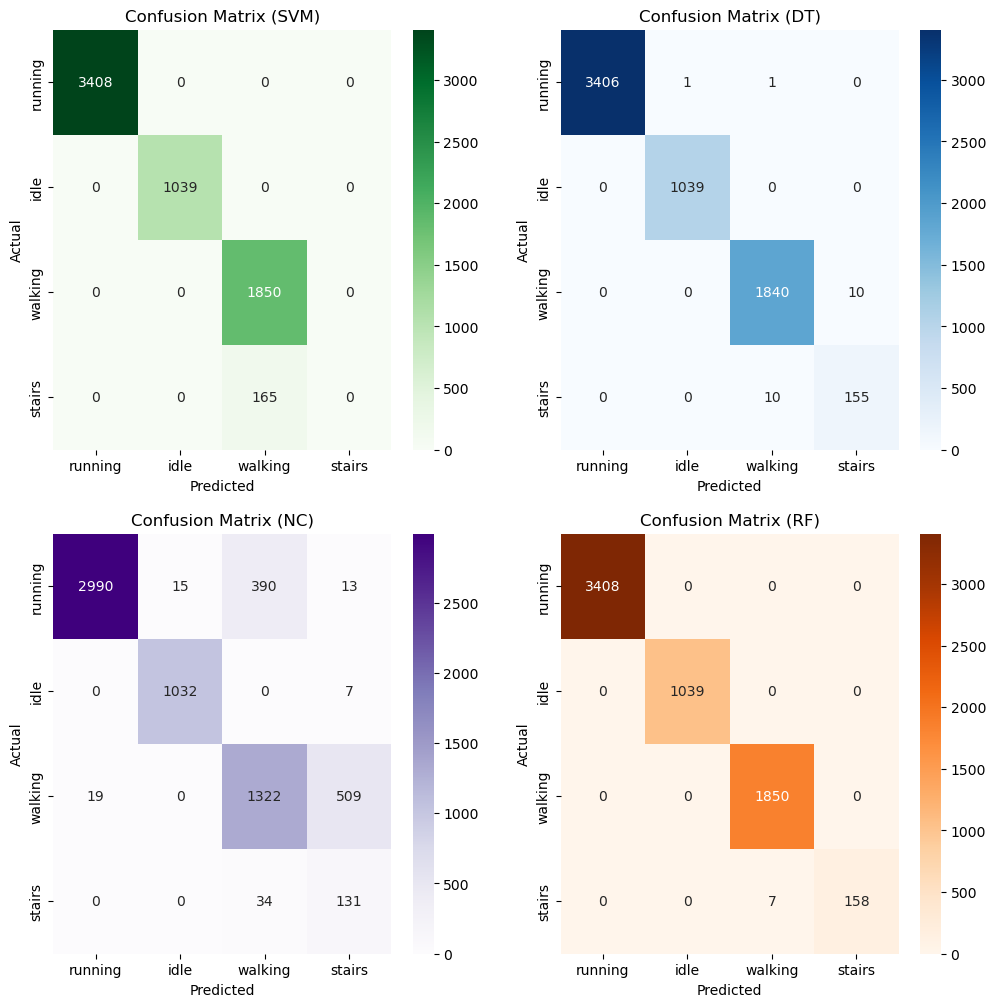

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 12))
    
plt.subplot(2, 2, 1)
svm_y_pred = cross_val_predict(svm_model, X, y, cv=10)
svm_conf_mat = confusion_matrix(y, svm_y_pred, labels=activities)

sns.heatmap(svm_conf_mat, annot=True, xticklabels=activities, yticklabels=activities, cmap="Greens", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')

plt.subplot(2, 2, 2)
dt_y_pred = cross_val_predict(dt_model, X, y, cv=10)
dt_conf_mat = confusion_matrix(y, dt_y_pred, labels=activities)

sns.heatmap(dt_conf_mat, annot=True, xticklabels=activities, yticklabels=activities, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (DT)')

plt.subplot(2, 2, 3)
nc_y_pred = cross_val_predict(nc_model, X, y, cv=10)
nc_conf_mat = confusion_matrix(y, nc_y_pred, labels=activities)

sns.heatmap(nc_conf_mat, annot=True, xticklabels=activities, yticklabels=activities, cmap="Purples", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (NC)')

plt.subplot(2, 2, 4)
rf_y_pred = cross_val_predict(rf_model, X, y, cv=10)
rf_conf_mat = confusion_matrix(y, rf_y_pred, labels=activities)

sns.heatmap(rf_conf_mat, annot=True, xticklabels=activities, yticklabels=activities, cmap="Oranges", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RF)')

plt.show()

Here, we can see that each model has some problem with classifying of walking and stairs. Nearest Centroid model also confused during classifying of running, for some amount of entries it classified it as walking.